# Project Description: Coffee Sales Time Series Analysis

To uncover patterns, trends, and anomalies within coffee sales data to inform strategic business decisions.
This analysis focused on time-series aspects, exploring next-day, week, and month sales predictions,as well as specific customer purchasing behaviors.


In [1]:
# import all tha libreries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load and print the data
data=pd.read_csv("E:\internship/index.csv")
data

date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1128  2024-07-31  2024-07-31 20:53:35.077      card  ANON-0000-0000-0443   
1129  2024-07-31  2024-07-31 20:59:25.013      card  ANON-0000-0000-0040   
1130  2024-07-31  2024-07-31 21:26:26.000      card  ANON-0000-0000-0444   
1131  2024-07-31  2024-07-31 21:54:11.824      card  ANON-0000-0000-0445   
1132  2024-07-31  2024-07-31 21:55:16.570      card  ANON-0000-0000-0446   

      money          coffee_name  
0     38.70                Latte  
1     38.70        Hot Chocolate  
2     38.70        Hot Chocolate  
3     28.90            Americano  
4     38.70                Latte  
...     ...                  ...  
1128  23.02              Cortado  
1129  27.92  Americano with Milk  
1130  32.82                Latte  
1131  32.82                Latte  
1132  32.82                Latte  

[1133 rows x 6 columns]

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [4]:
#handiling the missing values
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [5]:
# we can not drop the nnull value because if we drop the null value then we donit get cash data
# data=data.dropna()
# data

In [6]:
#handiling the missing values
data.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
#Convert date and datetime to datetme format
data['date']=pd.to_datetime(data['date'])
data['datetime']=pd.to_datetime(data['datetime'])
#Create column of Month, Weekdays, and Hours
data['month']=data['date'].dt.strftime('%Y-%m')
data['day']=data['date'].dt.strftime('%w')
data['hour']=data['datetime'].dt.strftime('%H')
     

In [9]:
#check the data information 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1044 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   month        1133 non-null   object        
 7   day          1133 non-null   object        
 8   hour         1133 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 79.8+ KB


In [10]:
#calculate the minimum and maximum value of date
[data['date'].min(),data['date'].max()]

[Timestamp('2024-03-01 00:00:00'), Timestamp('2024-07-31 00:00:00')]

In [11]:
data.describe()

date                       datetime  \
count                           1133                           1133   
mean   2024-05-19 11:36:29.232127232  2024-05-20 02:38:39.053382912   
min              2024-03-01 00:00:00     2024-03-01 10:15:50.520000   
25%              2024-04-14 00:00:00  2024-04-14 10:55:27.406000128   
50%              2024-05-23 00:00:00  2024-05-23 12:22:06.604999936   
75%              2024-06-22 00:00:00  2024-06-22 08:39:50.272999936   
max              2024-07-31 00:00:00     2024-07-31 21:55:16.570000   
std                              NaN                            NaN   

             money  
count  1133.000000  
mean     33.105808  
min      18.120000  
25%      28.900000  
50%      32.820000  
75%      37.720000  
max      40.000000  
std       5.035366

In [12]:
data.loc[:,['cash_type','card','coffee_name']].describe()

cash_type                 card          coffee_name
count       1133                 1044                 1133
unique         2                  446                    8
top         card  ANON-0000-0000-0012  Americano with Milk
freq        1044                   88                  268

In [13]:
#print cash type and value count
print(f"cash_type")

print(data['cash_type'].value_counts())
print()
print(f"coffee_name")

print(data['coffee_name'].value_counts())

cash_type
cash_type
card    1044
cash      89
Name: count, dtype: int64

coffee_name
coffee_name
Americano with Milk    268
Latte                  243
Cappuccino             196
Americano              169
Cortado                 99
Hot Chocolate           74
Espresso                49
Cocoa                   35
Name: count, dtype: int64


In [14]:
# sum  over all seles of each coffee
overall_sales = data.groupby(['coffee_name'])['money'].sum().reset_index()
overall_sales

coffee_name    money
0            Americano  4644.54
1  Americano with Milk  8601.94
2           Cappuccino  7333.14
3                Cocoa  1295.94
4              Cortado  2745.08
5             Espresso  1100.62
6        Hot Chocolate  2778.48
7                Latte  9009.14

<Axes: >

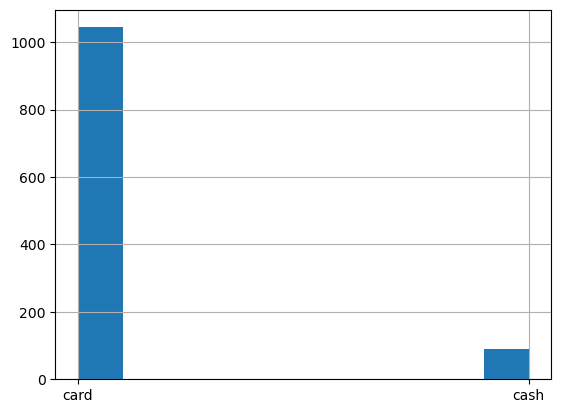

In [15]:
#Plotting the diagram of cash_type
data['cash_type'].hist()

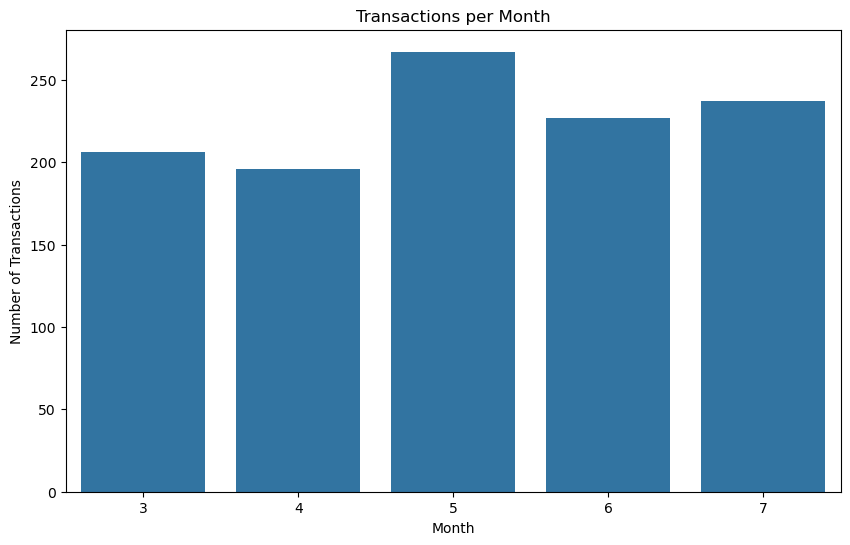

In [16]:
# Transactions over time
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = pd.to_datetime(data['datetime']).dt.hour
plt.figure(figsize=(10, 6))
sns.countplot(x='month', data=data)
plt.title('Transactions per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.show()

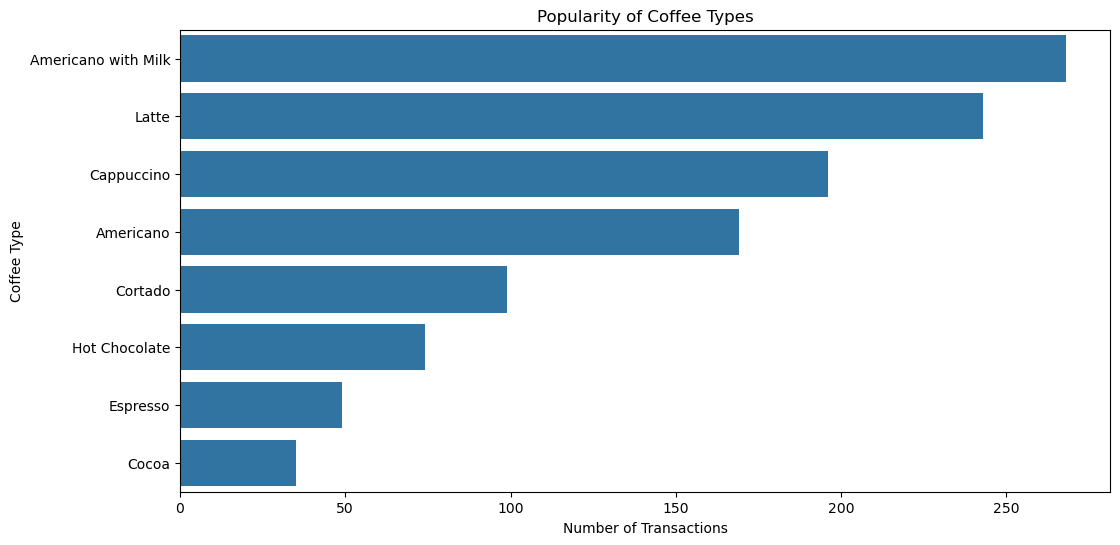

In [17]:
# Popularity of coffee types
plt.figure(figsize=(12, 6))
sns.countplot(y='coffee_name', data=data, order=data['coffee_name'].value_counts().index)
plt.title('Popularity of Coffee Types')
plt.xlabel('Number of Transactions')
plt.ylabel('Coffee Type')
plt.show()

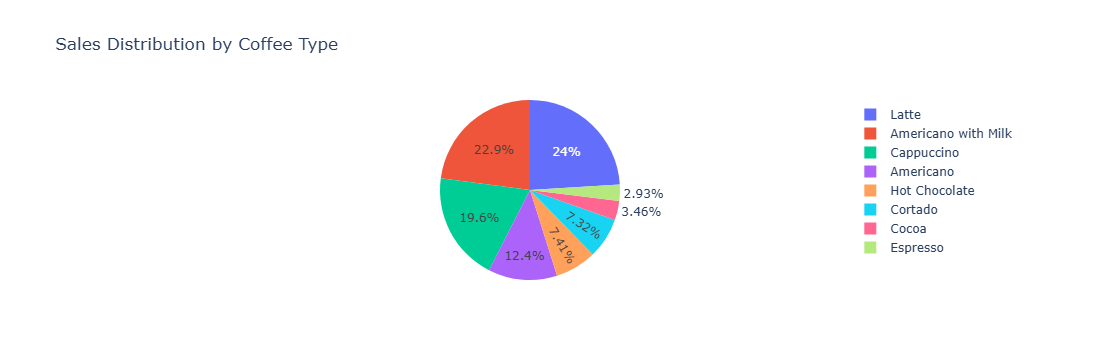

In [18]:
# Pie chart of coffee sales distribution
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['coffee_name'],values=data['money'])])
fig.update_layout(title='Sales Distribution by Coffee Type')
fig.show()

In [19]:
#count the cash types 
data['cash_type'].value_counts(normalize=True)

cash_type
card    0.921447
cash    0.078553
Name: proportion, dtype: float64

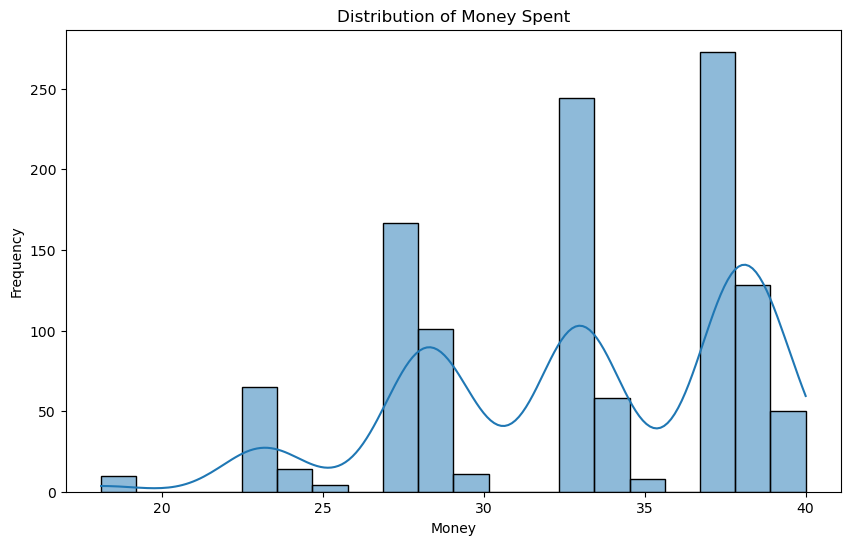

In [20]:
# Distribution of money spent
plt.figure(figsize=(10, 6))
sns.histplot(data['money'], bins=20, kde=True)
plt.title('Distribution of Money Spent')
plt.xlabel('Money')
plt.ylabel('Frequency')
plt.show()

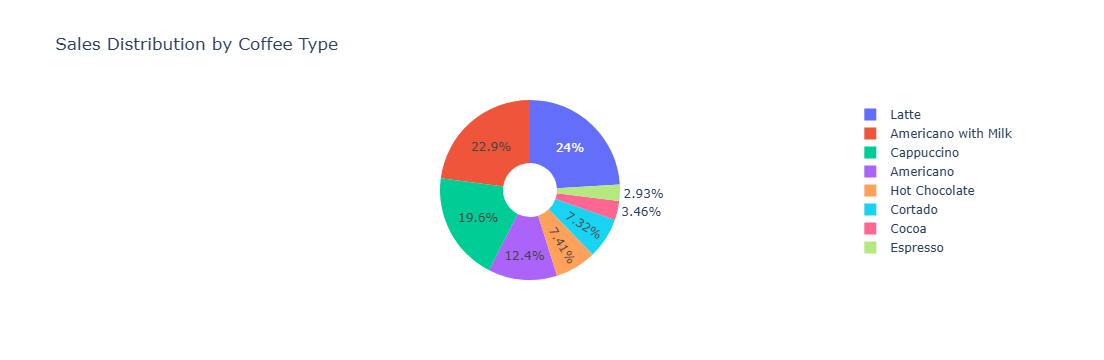

In [21]:
# Pie chart of coffee sales distribution
import plotly.graph_objects as go
fig = go.Figure(data=[go.Pie(labels=data['coffee_name'],values=data['money'], hole=0.3)])
fig.update_layout(title='Sales Distribution by Coffee Type')
fig.show()

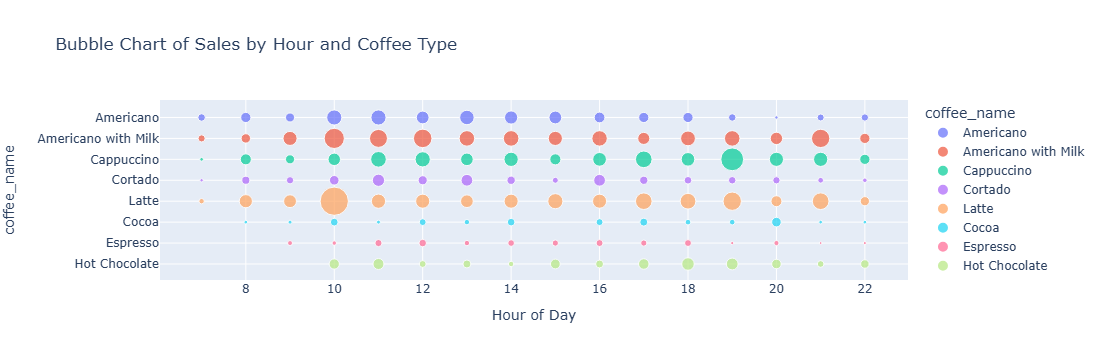

In [22]:
import plotly.express as px
bubble_data = data.groupby(['hour', 'coffee_name'])['money'].sum().reset_index()
fig = px.scatter(bubble_data, x='hour',
y='coffee_name',
size='money',
color='coffee_name',
title='Bubble Chart of Sales by Hour and Coffee Type',
labels={'hour': 'Hour of Day', 'money': 'Total Sales'})
fig.show()

In [23]:
# group the data of coffee name by using groupby function 
revenue_data = data.groupby(['coffee_name']).sum(['money']).reset_index().sort_values(by='money',ascending=False)

Text(0.5, 0, 'Revenue')

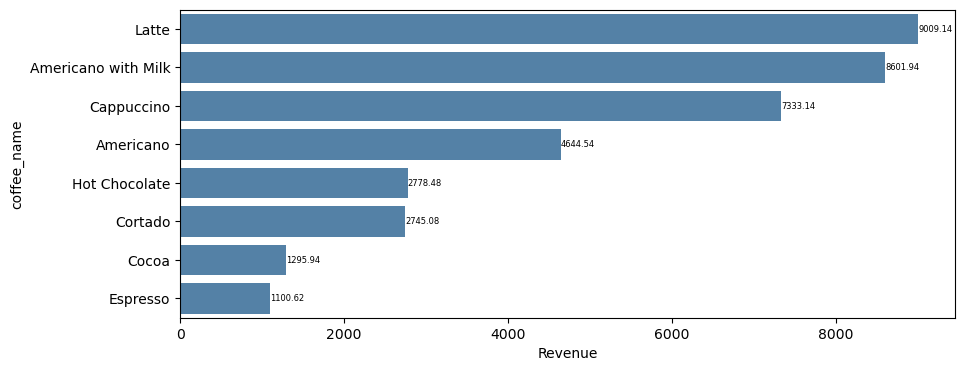

In [24]:
#plotting the total revenue data 
plt.figure(figsize=(10,4))
ax = sns.barplot(data=revenue_data,x='money',y='coffee_name',color='steelblue')
ax.bar_label(ax.containers[0], fontsize=6)
plt.xlabel('Revenue')
     

In [25]:
#check monthly sales data
monthly_sales = data.groupby(['coffee_name','month']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='month',columns='coffee_name',values='count').reset_index()
monthly_sales

coffee_name  month  Americano  Americano with Milk  Cappuccino  Cocoa  \
0                3         36                   34          20      6   
1                4         35                   42          43      6   
2                5         48                   58          55      9   
3                6         14                   69          46      5   
4                7         36                   65          32      9   

coffee_name  Cortado  Espresso  Hot Chocolate  Latte  
0                 30        10             22     48  
1                 19         7             13     31  
2                 17         8             14     58  
3                 19        10             14     50  
4                 14        14             11     56

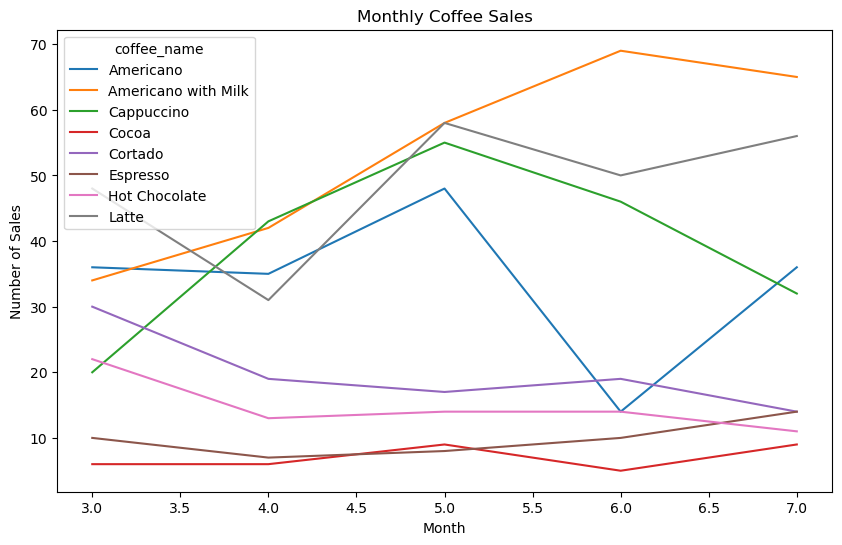

In [26]:
# Plot the monthly sales data
df = monthly_sales.set_index('month')
ax = df.plot(figsize=(10, 6))
plt.title('Monthly Coffee Sales')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.show()


In [27]:
#describr monthly sale data
monthly_sales.describe().T.loc[:,['min','max']]

min   max
coffee_name                    
month                 3.0   7.0
Americano            14.0  48.0
Americano with Milk  34.0  69.0
Cappuccino           20.0  55.0
Cocoa                 5.0   9.0
Cortado              14.0  30.0
Espresso              7.0  14.0
Hot Chocolate        11.0  22.0
Latte                31.0  58.0

In [28]:
#grouping the weekday sales data
weekday_sales = data.groupby(['day']).count()['date'].reset_index().rename(columns={'date':'count'})
weekday_sales

day  count
0     1     32
1     2     30
2     3     33
3     4     25
4     5     39
5     6     35
6     7     39
7     8     28
8     9     46
9    10     25
10   11     31
11   12     28
12   13     34
13   14     47
14   15     29
15   16     37
16   17     28
17   18     40
18   19     45
19   20     50
20   21     34
21   22     31
22   23     46
23   24     35
24   25     32
25   26     57
26   27     37
27   28     28
28   29     42
29   30     52
30   31     38

In [29]:
daily_sales = data.groupby(['coffee_name','date']).count()['datetime'].reset_index().reset_index().rename(columns={'datetime':'count'}).pivot(index='date',columns='coffee_name',values='count').reset_index().fillna(0)
daily_sales

coffee_name       date  Americano  Americano with Milk  Cappuccino  Cocoa  \
0           2024-03-01        1.0                  4.0         0.0    1.0   
1           2024-03-02        3.0                  3.0         0.0    0.0   
2           2024-03-03        1.0                  2.0         0.0    1.0   
3           2024-03-04        0.0                  1.0         0.0    0.0   
4           2024-03-05        0.0                  0.0         0.0    1.0   
..                 ...        ...                  ...         ...    ...   
145         2024-07-27        0.0                  5.0         4.0    0.0   
146         2024-07-28        0.0                  1.0         0.0    0.0   
147         2024-07-29        3.0                  2.0         2.0    1.0   
148         2024-07-30        2.0                 12.0         2.0    0.0   
149         2024-07-31        2.0                  6.0         1.0    2.0   

coffee_name  Cortado  Espresso  Hot Chocolate  Latte  
0                0.0       0.0            3.0    2.0  
1                0.0       0.0            0.0    1.0  
2                2.0       0.0            2.0    2.0  
3                0.0       1.0            0.0    2.0  
4                1.0       0.0            4.0    3.0  
..               ...       ...            ...    ...  
145              0.0       2.0            0.0    2.0  
146              0.0       1.0            0.0    1.0  
147              0.0       0.0            2.0    1.0  
148              3.0       2.0            0.0    3.0  
149              4.0       0.0            0.0    7.0  

[150 rows x 9 columns]

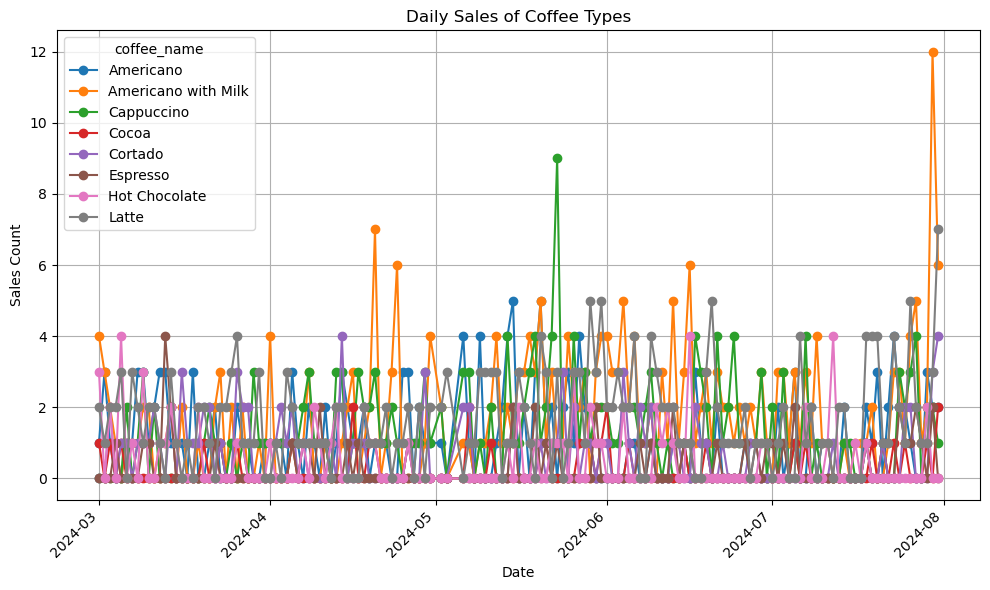

In [30]:
# Plot the daily sales for each coffee type
daily_sales.plot(x='date', kind='line', figsize=(10,6), marker='o')
# Customize the plot
plt.title('Daily Sales of Coffee Types')
plt.xlabel('Date')
plt.ylabel('Sales Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


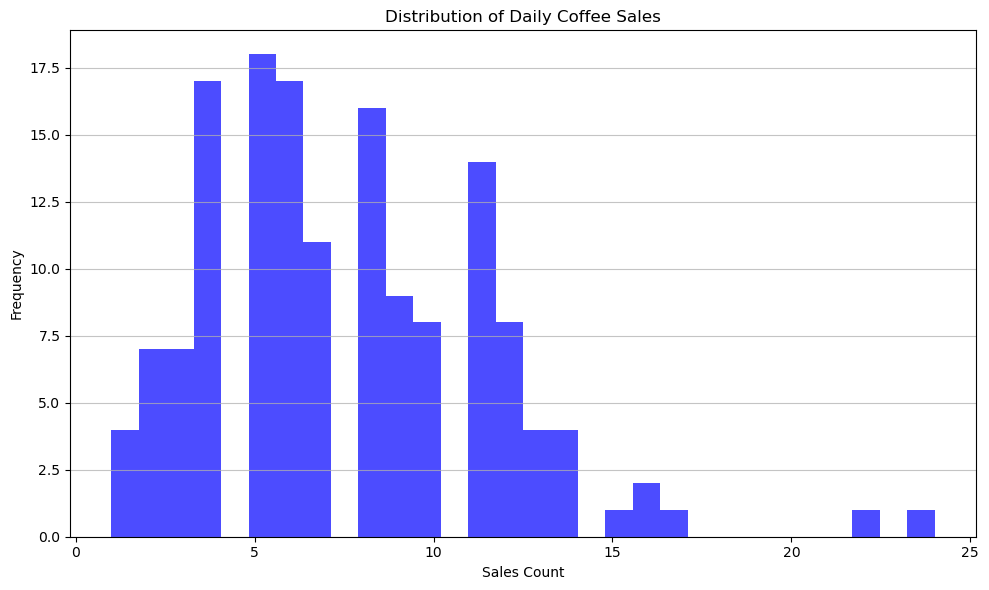

In [31]:
#Assuming 'daily_sales' is your DataFrame with a 'count' column
# If you want to plot a histogram for all coffee sales combined:
all_sales_counts = daily_sales.iloc[:, 1:].sum(axis=1)  # Summing sales across coffee types

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(all_sales_counts, bins=30, color='blue', alpha=0.7)
plt.title('Distribution of Daily Coffee Sales')
plt.xlabel('Sales Count')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()


In [32]:
daily_sales.iloc[:,1:].describe().T.loc[:,['min','max']]

min   max
coffee_name                   
Americano            0.0   5.0
Americano with Milk  0.0  12.0
Cappuccino           0.0   9.0
Cocoa                0.0   2.0
Cortado              0.0   4.0
Espresso             0.0   4.0
Hot Chocolate        0.0   4.0
Latte                0.0   7.0

In [33]:
hourly_sales = data.groupby(['hour']).count()['date'].reset_index().rename(columns={'date':'count'})
hourly_sales

hour  count
0      7     13
1      8     44
2      9     50
3     10    133
4     11    103
5     12     87
6     13     78
7     14     76
8     15     65
9     16     77
10    17     77
11    18     75
12    19     96
13    20     54
14    21     70
15    22     35

<Axes: xlabel='hour', ylabel='count'>

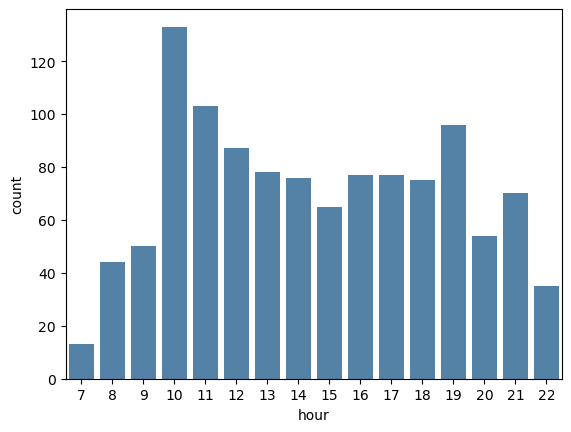

In [34]:
sns.barplot(data=hourly_sales,x='hour',y='count',color='steelblue')

In [35]:
#calculate the hourly sales for different coffee types
hourly_sales_coffee = data.groupby(['hour','coffee_name']).count()['date'].reset_index().rename(columns={'date':'count'}).pivot(index='hour',columns='coffee_name',values='count').fillna(0).reset_index()
hourly_sales_coffee
     

coffee_name  hour  Americano  Americano with Milk  Cappuccino  Cocoa  Cortado  \
0               7        5.0                  4.0         1.0    0.0      1.0   
1               8       10.0                  7.0         8.0    1.0      6.0   
2               9        8.0                 16.0         6.0    1.0      5.0   
3              10       20.0                 31.0        10.0    4.0      8.0   
4              11       21.0                 25.0        16.0    1.0     13.0   
5              12       14.0                 26.0        15.0    3.0      7.0   
6              13       18.0                 18.0        10.0    2.0     12.0   
7              14       15.0                 18.0        13.0    4.0      6.0   
8              15       14.0                 15.0         8.0    0.0      3.0   
9              16       10.0                 18.0        12.0    3.0     12.0   
10             17        9.0                 11.0        18.0    4.0      6.0   
11             18        9.0                 16.0        12.0    2.0      5.0   
12             19        5.0                 18.0        34.0    2.0      5.0   
13             20        1.0                 12.0        13.0    6.0      5.0   
14             21        5.0                 25.0        13.0    1.0      3.0   
15             22        5.0                  8.0         7.0    1.0      2.0   

coffee_name  Espresso  Hot Chocolate  Latte  
0                 0.0            0.0    2.0  
1                 0.0            0.0   12.0  
2                 3.0            0.0   11.0  
3                 2.0            7.0   51.0  
4                 6.0            8.0   13.0  
5                 6.0            3.0   13.0  
6                 3.0            4.0   11.0  
7                 5.0            2.0   13.0  
8                 4.0            6.0   15.0  
9                 5.0            4.0   13.0  
10                4.0            7.0   18.0  
11                5.0           10.0   16.0  
12                1.0            9.0   22.0  
13                3.0            6.0    8.0  
14                1.0            3.0   19.0  
15                1.0            5.0    6.0

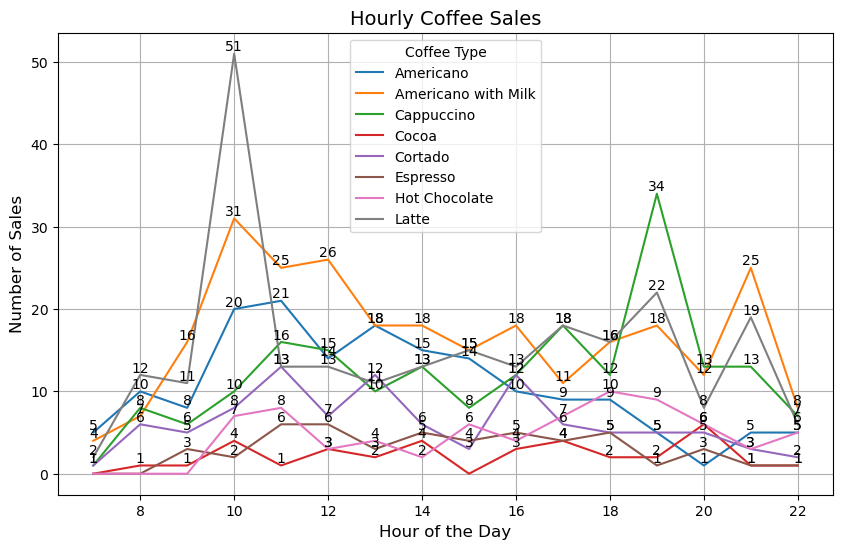

In [36]:
# Set the index to 'hour' for plotting
df = hourly_sales_coffee.set_index('hour')

# Plot the data with multiple lines
ax = df.plot(kind='line', figsize=(10, 6))

# Add labels and title
plt.title('Hourly Coffee Sales', fontsize=14)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Sales', fontsize=12)

# Loop through each line to annotate the values
for coffee_type in df.columns:
    for x, y in zip(df.index, df[coffee_type]):
        if y != 0:  # Only label non-zero values to avoid clutter
            ax.text(x, y, str(int(y)), color='black', fontsize=10, ha='center', va='bottom')

# Show the legend and plot
plt.legend(title='Coffee Type')
plt.grid(True)
plt.show()


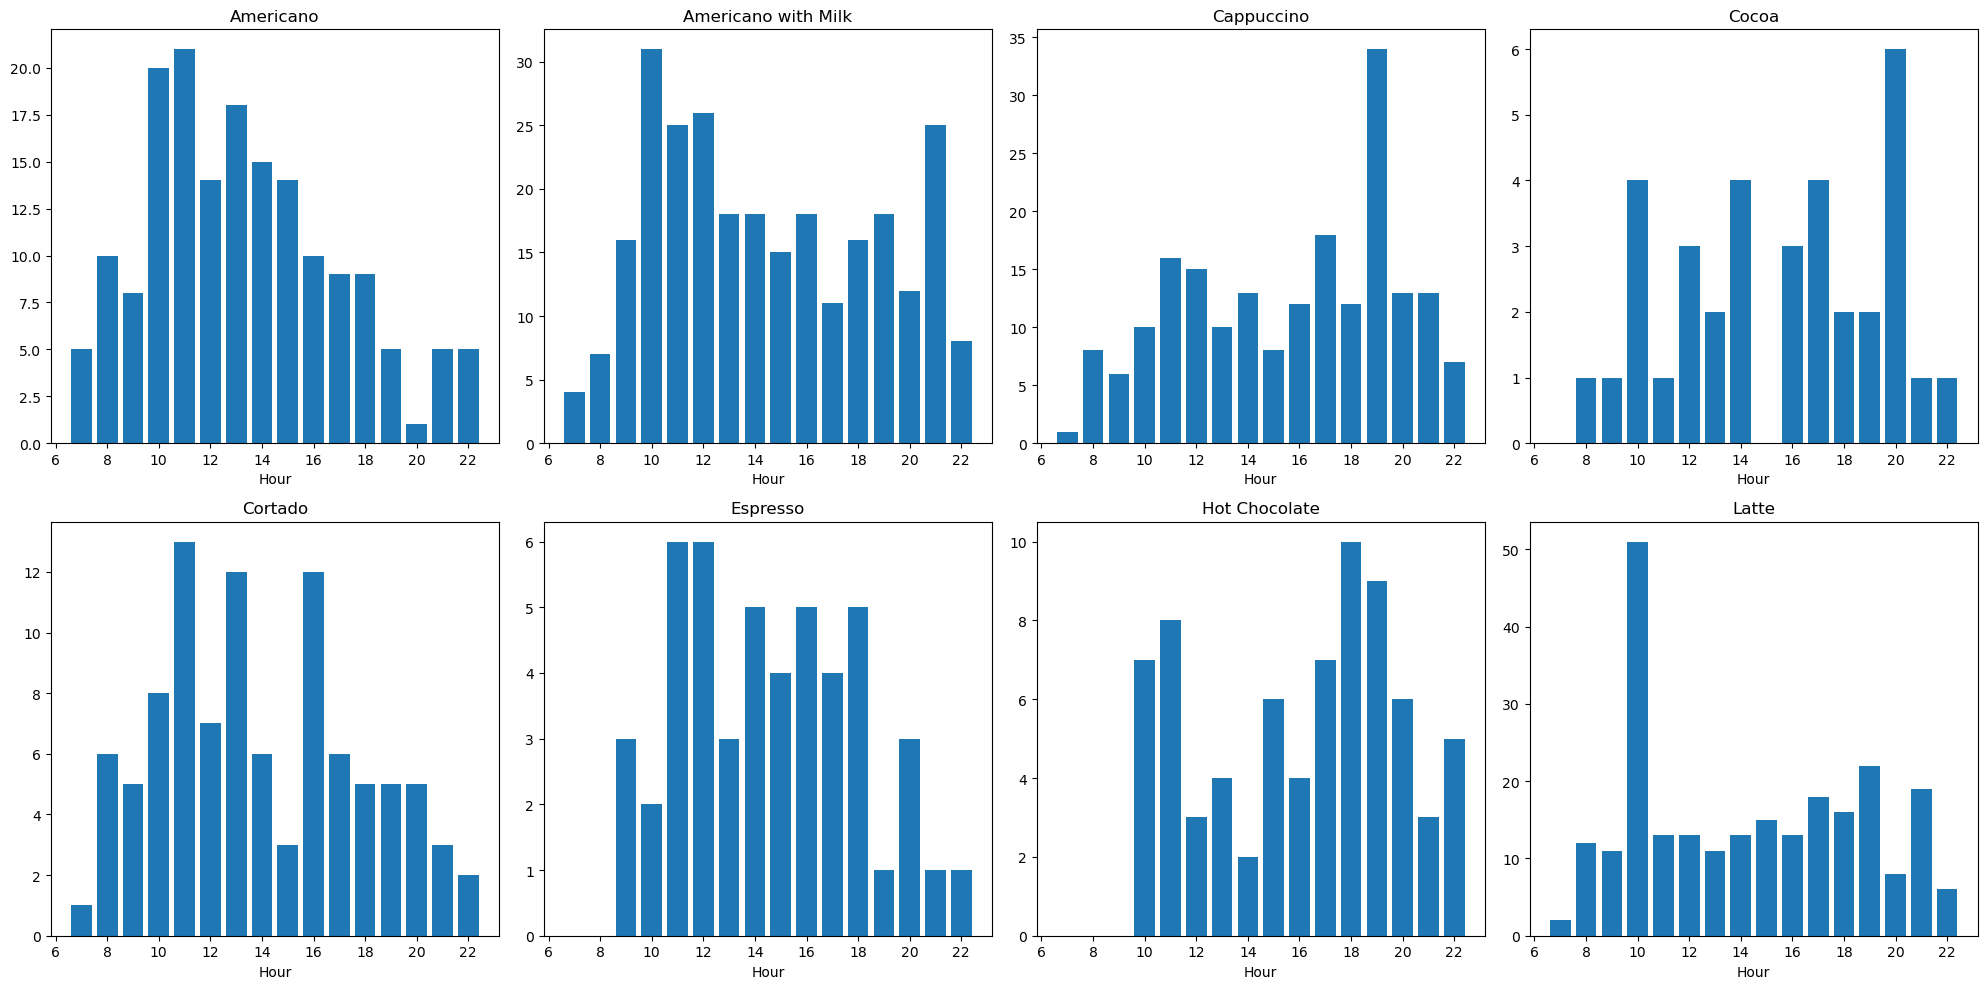

In [37]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Flatten the array of subplots for easy iteration
axs = axs.flatten()

# Loop through each column in the DataFrame, skipping the 'Index' column
for i, column in enumerate(hourly_sales_coffee.columns[1:]):  # Skip the first column ('Index')
    axs[i].bar(hourly_sales_coffee['hour'], hourly_sales_coffee[column])
    axs[i].set_title(f'{column}')
    axs[i].set_xlabel('Hour')
    #axs[i].set_ylabel('Sales')

plt.tight_layout()

# Show the plot
plt.show()

This project successfully leveraged time series analysis and customer behavior analysis to gain valuable insights into coffee sales data. The findings provided a solid foundation for data-driven decision-making and business optimization.#